

Visual Cryptography, doğru anahtar resmi kullanıldığında bilgiyi insan gözü tarafından çözülebilecek şekilde resimlerde gizleyen özel bir şifreleme tekniğidir. Bu teknik 1994 yılında Naor ve Shamir tarafından önerilmiştir. Görsel Şifreleme, iki şeffaf resim kullanır. Bir resim rastgele pikseller içerirken, diğer resim gizli bilgiyi içerir. Resimlerden birinden gizli bilgiyi elde etmek imkansızdır. Bilgiyi ortaya çıkarmak için her iki şeffaf resim veya katmanın da gereklidir. Görsel Şifreleme'yi uygulamanın en kolay yolu, iki katmanı da bir şeffaf sayfaya basmaktır. Rastgele resim gerçekten rastgele pikseller içeriyorsa, bu bir Kereliğine Mahsus Şifreleme sistemi olarak görülebilir ve kırılamaz bir şifreleme sunar.

Görsel kriptografi, bir görüntüyü parçalara ayırarak ve bu parçaların yalnızca belirli birleşimlerde orijinal görüntüyü açığa çıkaracak şekilde şifreleme yapan bir kriptografi yöntemidir. Bu yöntem genellikle iki veya daha fazla parçaya ayrılmış görüntüler (katmanlar) kullanır.

Her bir parça tek başına anlamsızdır ve orijinal görüntüyü göstermez. Ancak, bu parçalar doğru şekilde birleştirildiğinde, orijinal görüntü ortaya çıkar. Görsel kriptografinin en önemli özelliklerinden biri, şifre çözme işleminin herhangi bir kriptografik hesaplama yapmadan, genellikle sadece parçaları üst üste koymak suretiyle yapılabilmesidir.

Bu yöntem, güvenli kimlik doğrulama kartları, sırlı mesajların saklanması ve iletilmesi, ve su markaları gibi uygulamalarda kullanılır. Örneğin, bir kimlik doğrulama kartında, bir parça kullanıcıya verilirken, diğer parça bir güvenlik sisteminde saklanabilir. Kullanıcı kimliğini doğrulamak için, bu iki parçanın birleştirilmesi gerekir.

Python kullanarak bu işlemi nasıl yapacağımıza dair kodu aşağıda bulabilirsiniz.

1. **Rastgele Bir Resim (Anahtar Katman) Üretmek**: Bu, rastgele pikseller içeren siyah ve beyaz bir resim olacak.
2. **Gizli Mesajı Şifrelemek (Mesaj Katmanı)**: Gizli mesaj başka bir siyah ve beyaz resim olacak. Gizli mesajdaki her siyah piksel için, anahtar katmanda ve mesaj katmanında tamamlayıcı desenler oluşturacağız. Beyaz pikseller için, desenler aynı olacak.
3. **Mesajı Çözmek**: Anahtar katmanı ve mesaj katmanını üst üste getirerek gizli mesajı ortaya çıkaracağız.

Bu süreci gerçekleştirmek için `PIL` gibi resim işleme ve `numpy` gibi dizi işleme kütüphanelerini kullanacağız.

In [1]:
from PIL import Image
import numpy as np
import random

def generate_random_image(width, height):
    """Generates a random black and white image."""
    return np.random.choice([0, 255], size=(height, width), p=[0.5, 0.5]).astype(np.uint8)

def encrypt_message(secret_image_path, width, height):
    """Encrypts the secret message."""
    # Load the secret image and convert it to black and white
    secret_image = Image.open(secret_image_path).convert("L").resize((width, height))
    secret_array = np.array(secret_image)

    # Generate a random image (key layer)
    key_layer = generate_random_image(width, height)

    # Prepare the message layer
    message_layer = np.zeros((height, width), dtype=np.uint8)

    # Iterate over each pixel
    for i in range(height):
        for j in range(width):
            if secret_array[i, j] < 128:  # If pixel is black in secret image
                # Invert the key layer pixel in the message layer
                message_layer[i, j] = 255 - key_layer[i, j]
            else:  # If pixel is white in secret image
                # Copy the key layer pixel to the message layer
                message_layer[i, j] = key_layer[i, j]

    return key_layer, message_layer

def decrypt_message(key_layer, message_layer):
    """Decrypts the message by overlaying the key and message layers."""
    return np.bitwise_and(key_layer, message_layer)


In [2]:
# Example usage
key_layer, message_layer = encrypt_message("./secret_image.png", 100, 100)

In [3]:
# Convert arrays to images for visualization
key_image       = Image.fromarray(key_layer)
message_image   = Image.fromarray(message_layer)
decrypted_image = Image.fromarray(decrypt_message(key_layer, message_layer))

In [13]:
# Display the images (for demonstration purposes, normally you'd save or return them)
key_image.show()
message_image.show()
decrypted_image.show()
decrypted_image.save('./decrypted_image.png')

In [11]:
# Kodun revize edilmiş hali, burada görüntüleri kaydetme işlemi de dahil edilecek.

def save_images(random_image, encrypted_image, random_image_path, encrypted_image_path):
    """Save the given images to the specified paths."""
    random_image.save(random_image_path)
    encrypted_image.save(encrypted_image_path)

# Görüntüleri kaydetmek için yollar
random_image_path = './random_image.png'
encrypted_image_path = './encrypted_image.png'

# Görüntüleri kaydet
save_images(key_image, message_image, random_image_path, encrypted_image_path)

# Kaydedilen görüntülerin yollarını döndür
random_image_path, encrypted_image_path

('./random_image.png', './encrypted_image.png')

In [6]:
from PIL import Image
import random

def generate_random_image(size):
    """Generate a random black and white image of the given size."""
    return Image.new('1', size, 0)

def visual_cryptography(image_path):
    """Apply visual cryptography to the given image."""
    # Load the original image
    original_image = Image.open(image_path).convert('1')  # convert to black and white

    # Generate a random image
    random_image = generate_random_image(original_image.size)

    # Create an image for the encrypted version
    encrypted_image = Image.new('1', original_image.size)

    # Apply visual cryptography
    for x in range(original_image.size[0]):
        for y in range(original_image.size[1]):
            random_pixel = random.randint(0, 1)
            original_pixel = original_image.getpixel((x, y))

            # Apply XOR between the original pixel and the random pixel
            encrypted_pixel = original_pixel ^ random_pixel

            # Set the pixels in the random and encrypted images
            random_image.putpixel((x, y), random_pixel)
            encrypted_image.putpixel((x, y), encrypted_pixel)

    return random_image, encrypted_image

In [14]:
# The path to the image file
image_path = './secret_image.png'  # Replace with the path to your image file

In [15]:
# Apply visual cryptography
random_image, encrypted_image = visual_cryptography(image_path)

In [16]:
# Display the images
random_image.show()
encrypted_image.show()

In [17]:
# Kodun revize edilmiş hali, burada görüntüleri kaydetme işlemi de dahil edilecek.

def save_images(random_image, encrypted_image, random_image_path, encrypted_image_path):
    """Save the given images to the specified paths."""
    random_image.save(random_image_path)
    encrypted_image.save(encrypted_image_path)

# Görüntüleri kaydetmek için yollar
random_image_path = './random_image.png'
encrypted_image_path = './encrypted_image.png'

# Görüntüleri kaydet
save_images(random_image, encrypted_image, random_image_path, encrypted_image_path)

# Kaydedilen görüntülerin yollarını döndür
random_image_path, encrypted_image_path



('./random_image.png', './encrypted_image.png')

In [18]:
def decrypt_images(random_image, encrypted_image):
    """Decrypt the original image by combining the random and encrypted images."""
    # Create an image for the decrypted version
    decrypted_image = Image.new('1', random_image.size)

    # Combine the images
    for x in range(random_image.size[0]):
        for y in range(random_image.size[1]):
            # Apply AND operation between the corresponding pixels
            decrypted_pixel = random_image.getpixel((x, y)) & encrypted_image.getpixel((x, y))
            decrypted_image.putpixel((x, y), decrypted_pixel)

    return decrypted_image

# Not: Bu kod, random_image ve encrypted_image nesnelerinin tanımlı olduğu varsayımıyla çalışır.
# Şu anda bu nesneler yok, çünkü önceki adımda bir hata oluştu ve bu nesneler oluşturulmadı.
# Bu kodun çalışabilmesi için, önce random_image ve encrypted_image nesnelerini oluşturmak gerekir.
# Bu nesneleri oluşturduktan sonra, bu fonksiyonu kullanarak şifre çözme işlemini gerçekleştirebiliriz.

# Örnek olarak, yukarıda tanımlanan visual_cryptography fonksiyonunu kullanarak bu nesneleri oluşturabiliriz.
# Ancak, bunun için geçerli bir görüntü dosyasına ihtiyaç vardır. Lütfen bir görüntü dosyası yükleyin.


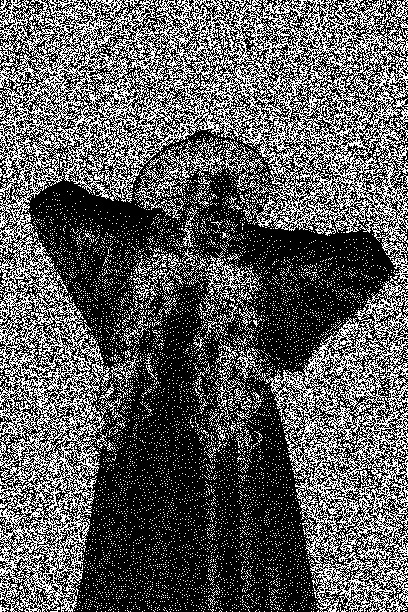

In [19]:
decrypt_images(random_image, encrypted_image)

yeni kod

In [20]:
from PIL import Image, ImageChops, ImageDraw

def generate_key_image(width, height):
    """Generate an image with random black and white pixels."""
    key_image = Image.new('1', (width, height))  # '1' for 1-bit pixels
    pixels = key_image.load()

    for i in range(width):
        for j in range(height):
            pixels[i, j] = random.randint(0, 1)

    return key_image

def generate_secret_image(text, width, height):
    """Generate an image with a secret text message."""
    # Create an image for the text
    text_image = Image.new('1', (width, height), 1)  # White background
    draw = ImageDraw.Draw(text_image)

    # Simple text positioning (approximately center)
    text_x = width // 4
    text_y = height // 4

    # Adding text to the image
    draw.text((text_x, text_y), text, fill=0)  # Black text

    return text_image

def combine_images(key_image, secret_image):
    """Combine the key and secret images."""
    return ImageChops.logical_and(key_image, secret_image)

In [21]:
# Set dimensions for the images
width, height = 200, 100

In [27]:
# Generate key and secret images
key_image = generate_key_image(width, height)
secret_image = generate_secret_image("Gizli mesaj", width, height)

In [28]:
# Combine the images to reveal the secret
combined_image = combine_images(key_image, secret_image)

In [29]:
# Combine the images to reveal the secret
combined_image = combine_images(key_image, secret_image)

In [30]:
# Show the images for demonstration
key_image.show()
secret_image.show()
combined_image.show()

# Saving the images to files
key_image.save("./key_image.png")
secret_image.save("./secret_image.png")
combined_image.save("./combined_image.png")